In [ ]:
! python --version

Python 3.12.11


In [ ]:
! pip install lmfit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np # pacote para operações matemáticas
import pandas as pd # construção de planilhas
import matplotlib.pyplot as plt # plotagem de gráficos
import lmfit as lm # Regressão não linear
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipython-input-2846265170.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


Importando os dados experimentais

In [ ]:
time= [0,
       3,
       5,
       10,
       15,
       20,
       30,
       45,
       60,
       75,
       90,
       120,
       150,
       180,
       210,
       240]

CCo_exp = [0.025,
            0.041,
            0.041,
            0.050,
            0.074,
            0.099,
            0.132,
            0.347,
            0.579,
            0.694,
            0.760,
            0.950,
            0.967,
            0.983,
            0.992,
            1.000]

**Yoon-Nelson Model**

# $\frac{C_t}{C_0}=\frac{1}{1+e^{K_{YN}(\tau-t)}}$

where,

$K_{YN}$ is the rate constant ($min^{-1}$)

$\tau$ is time required for 50 % adsorbate breakthrough ($min$)

$\ \$

------------------------------------------------------------------------

$\ \$

Eixo $x$ ~ tempo ($t$) / Eixo $y$ ~ $\frac{C_{t}}{C_0^{-1}}$

In [ ]:
def Yoon_Nelson(t,kYN,tau):
  # C/Co = 1/(1+exp*(kYN(tau-t)) )
  return 1 / (1 + np.exp(kYN*(tau-t)))

In [ ]:
CCo_pred = np.empty(len(CCo_exp))

modelo_YN = lm.Model(Yoon_Nelson)
modelo_YN_parametros = modelo_YN.make_params(kYN=0.2,tau=0.5)
reg_modelo_YN = modelo_YN.fit(CCo_exp,modelo_YN_parametros,t=time)

reg_modelo_YN

In [ ]:
K = len(reg_modelo_YN.params)
N = len(time)

print(f'Tenho {K} parâmetros')
print(f'Tenho {N} dados',N)

print('Tenho {0:d} parâmetros e {1:d} dados'.format(K,N))

Tenho 2 parâmetros
Tenho 16 dados 16
Tenho 2 parâmetros e 16 dados


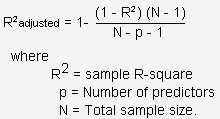

In [ ]:
R2 = reg_modelo_YN.rsquared
R2_ajd = 1-((1-R2)*(N-1)/(N-K-1))

print(f'R²: {R2}\nR² ajustado: {R2_ajd}')

R²: 0.9940982658793455
R² ajustado: 0.9931903067838601


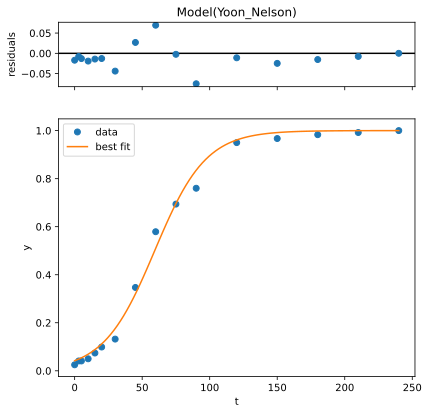

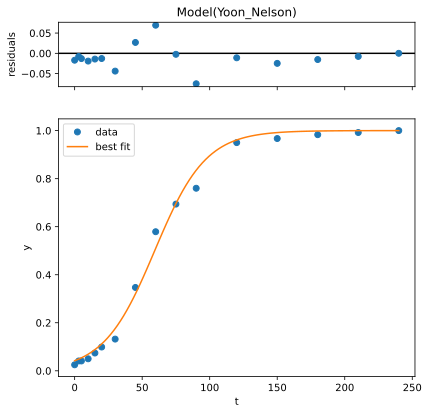

In [ ]:
reg_modelo_YN.plot(numpoints=100)

In [ ]:
kYN = reg_modelo_YN.best_values['kYN']
tau = reg_modelo_YN.best_values['tau']

CCo_pred = np.empty(N)

for i in range(N):
  CCo_pred[i] = 1 / (1 + np.exp(kYN*(tau-time[i])))

df = pd.DataFrame({'time':time,'C/Co experimental':CCo_exp, 'C/Co predito':CCo_pred})

In [ ]:
df

,time,C/Co experimental,C/Co predito
0,0,0.025,0.041961
1,3,0.041,0.048809
2,5,0.041,0.053949
3,10,0.050,0.069115
4,15,0.074,0.088147
5,20,0.099,0.111790
6,30,0.132,0.175837
7,45,0.347,0.320136
8,60,0.579,0.509629
9,75,0.694,0.696394


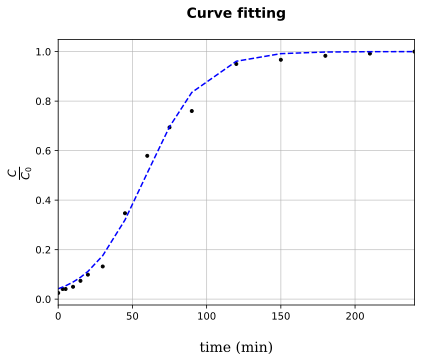

In [ ]:
plt.title('Curve fitting\n',size=14,family='sans-serif',weight='semibold')
plt.plot(time,CCo_exp,'k.')
plt.plot(time,CCo_pred,'b--')
plt.xlabel('\ntime (min)',size=14,family='serif',weight='normal')
plt.ylabel(r'$\frac{C}{C_{0}}$',size=16,family='serif',weight='normal')
plt.grid(alpha=0.70)
#plt.xticks(np.arange(0,140,10),family='serif')
#plt.yticks(np.arange(0,140,10),family='serif')
plt.margins(0.0001,0.05)